In [1]:
from tensorflow.keras.models import model_from_json

# Load trained model
json_file = open('hom_net_reg.json', 'r')
model_json = json_file.read()
json_file.close()

model = model_from_json(model_json)
# Load weights into new model
model.load_weights("hom_net_reg.h5")
print("Model loaded!")

Model loaded!


In [2]:
import pickle

# Load list of images from which the model was trained
with open("examples_visualization.pickle", "rb") as f:
    # store the data as binary data stream
    examples = pickle.load(f)

In [3]:
import matplotlib.image as mpimg
from os.path import join
import matplotlib.pyplot as plt
import cv2 as cv

TRAIN_IMAGES_PATH = '../../../../Desktop/train2017'

IMG_WIDTH = 320
IMG_HEIGHT = 240

img_name = examples[2]
img = mpimg.imread(join(TRAIN_IMAGES_PATH, img_name))

# To test the notebook with a specific image, use the code below
#img_name2 = 'test-image-1.jpg'
#img = mpimg.imread(img_name2)

resized_img = cv.resize(img, (IMG_WIDTH, IMG_HEIGHT))
gray_img = cv.cvtColor(resized_img, cv.COLOR_RGB2GRAY)

plt.imshow(resized_img)
plt.show()

<Figure size 640x480 with 1 Axes>

Using TensorFlow backend.


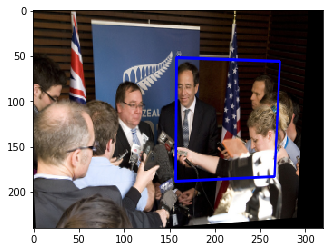

In [4]:
import hom_train
import numpy as np

patch_orig, patch_warped, corners_square, perturbed_corners_square = hom_train.generate_crop_patches(img)

H_ab = cv.getPerspectiveTransform(np.float32(corners_square), np.float32(perturbed_corners_square))
H_ba = np.linalg.inv(H_ab)

resized_img_copy = resized_img.copy()

cv.polylines(resized_img_copy, np.array([corners_square]), True, (0,0,255), 2)

warped_img = cv.warpPerspective(resized_img_copy, H_ab, (IMG_WIDTH, IMG_HEIGHT))

plt.imshow(warped_img)

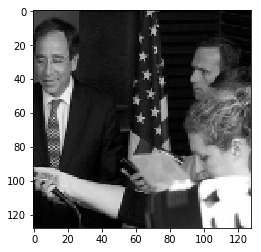

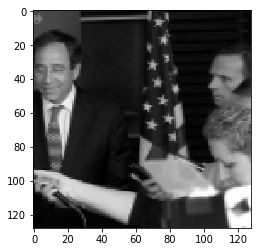

In [5]:
top_left = corners_square[0]
top_right = corners_square[1]
bottom_right = corners_square[2]
bottom_left = corners_square[3]

plt.imshow(patch_orig, cmap='gray')
plt.show()

plt.imshow(patch_warped, cmap='gray')
plt.show()

In [6]:
patch_size = 128
test_example = np.zeros((1, patch_size, patch_size, 2))
test_example[0, :, :, 0] = patch_orig
test_example[0, :, :, 1] = patch_warped

prediction = model.predict(test_example)
corner_diff = prediction.reshape(4, 2)

[[157.85232008  52.42926502]
 [273.23121643  53.86463594]
 [267.12111855 183.40174818]
 [156.39747661 189.71980447]]


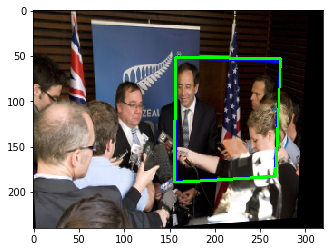

In [7]:
projected_corners = np.array(corners_square) + np.array(corner_diff)
print(projected_corners)

cv.polylines(warped_img, np.int32([projected_corners]), True, (0,255,0), 2)

plt.imshow(warped_img)

In [8]:
import scipy.misc

# Use the code below to save the result
#scipy.misc.imsave('rgb_gradient.png', warped_img)